In [1]:
%matplotlib inline
import pandas as pd
from os import listdir
from matplotlib import pyplot as plt
import numpy as np
import glob, re
import seaborn as sns
from datetime import datetime,date

In [2]:
%%bash
ls data/

test_table.csv
user_table.csv


In [3]:
dfs = { re.search('/([^/\.]*)\.csv', fn).group(1):pd.read_csv(fn) for fn in glob.glob('data/*.csv')}
print('data frames read:{}'.format(list(dfs.keys())))

print('local variables with the same names are created.')
for k, v in dfs.items(): locals()[k] = v

data frames read:['test_table', 'user_table']
local variables with the same names are created.


In [4]:
for k, v in dfs.items():
    print(k)
    print(v.head())
    print(v.shape)
#     if k!='user_table':
#         data = data.merge(right=v.rename(index=str,columns={'page':k.split('_table')[0]}),on='user_id',how='left')

test_table
   user_id        date  source  device browser_language ads_channel  \
0   315281  2015-12-03  Direct     Web               ES         NaN   
1   497851  2015-12-04     Ads     Web               ES      Google   
2   848402  2015-12-04     Ads     Web               ES    Facebook   
3   290051  2015-12-03     Ads  Mobile            Other    Facebook   
4   548435  2015-11-30     Ads     Web               ES      Google   

       browser  conversion  test  
0           IE           1     0  
1           IE           0     1  
2       Chrome           0     0  
3  Android_App           0     1  
4      FireFox           0     1  
(453321, 9)
user_table
   user_id sex  age    country
0   765821   M   20     Mexico
1   343561   F   27  Nicaragua
2   118744   M   23   Colombia
3   987753   F   27  Venezuela
4   554597   F   20      Spain
(452867, 4)


In [6]:
data = test_table.merge(user_table,on='user_id',how='left')

In [7]:
data['country'].unique()

array(['Spain', 'Mexico', 'Venezuela', 'Bolivia', 'Colombia', 'Uruguay',
       'El Salvador', 'Nicaragua', 'Peru', 'Costa Rica', 'Chile',
       'Argentina', 'Ecuador', 'Guatemala', 'Honduras', 'Paraguay',
       'Panama', nan], dtype=object)

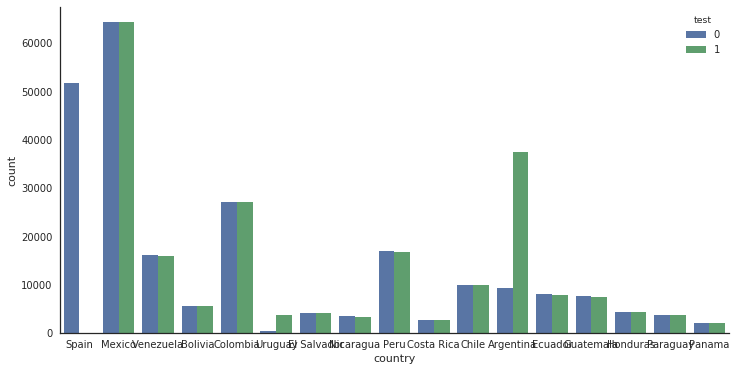

In [9]:
plt.figure(figsize=(12,6))
sns.set(style='white')
ax = sns.countplot(x='country', hue='test',data=data)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.grid(False)

Too many test cases in argentina

In [11]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


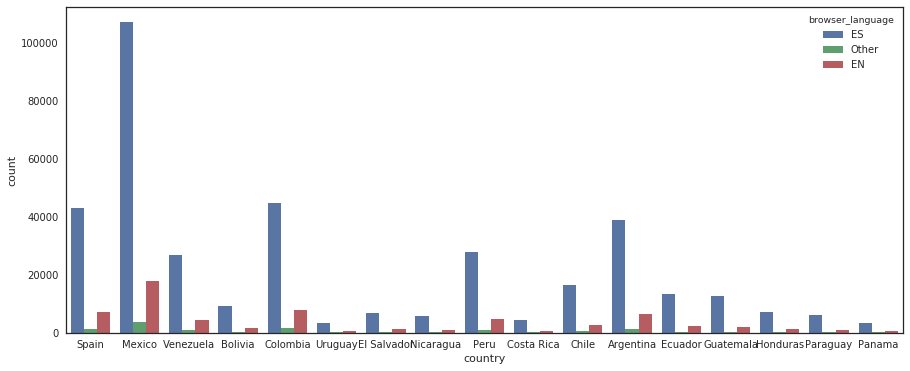

In [13]:
plt.figure(figsize=(15,6))
sns.set(style='white')
ax = sns.countplot(x='country', hue='browser_language',data=data)

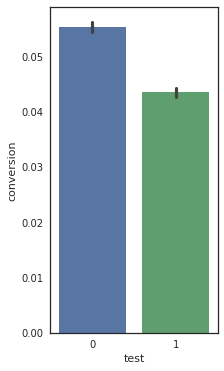

In [16]:
plt.figure(figsize=(3,6))
sns.set(style='white')
ax = sns.barplot(x='test', y='conversion',data=data)

Test does not seem to be a difference indeed in the results of the test. But how about if we exclude the non-spanish browsers.

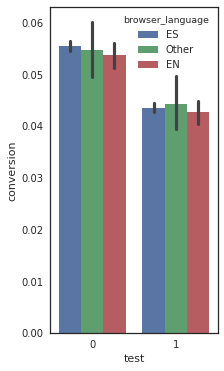

In [17]:
plt.figure(figsize=(3,6))
sns.set(style='white')
ax = sns.barplot(x='test', y='conversion',hue='browser_language',data=data)

Let's exclude Spain and Argentian, since sample size are not balanced in these two countries

In [21]:
data_ex = data[(data.country!='Spain')&(data.country!='Argentina')&(data.country!='Uruguay')]

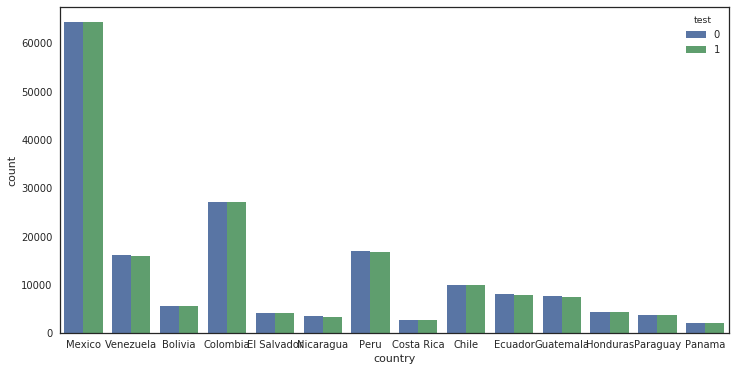

In [22]:
plt.figure(figsize=(12,6))
sns.set(style='white')
ax = sns.countplot(x='country', hue='test',data=data_ex)

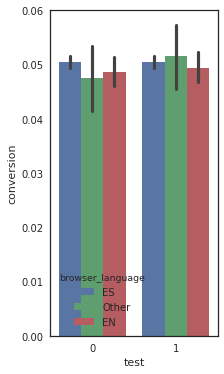

In [23]:
plt.figure(figsize=(3,6))
sns.set(style='white')
ax = sns.barplot(x='test', y='conversion',hue='browser_language',data=data_ex)

In [24]:
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [25]:
data_spa = data_ex[data_ex.browser_language=='ES']

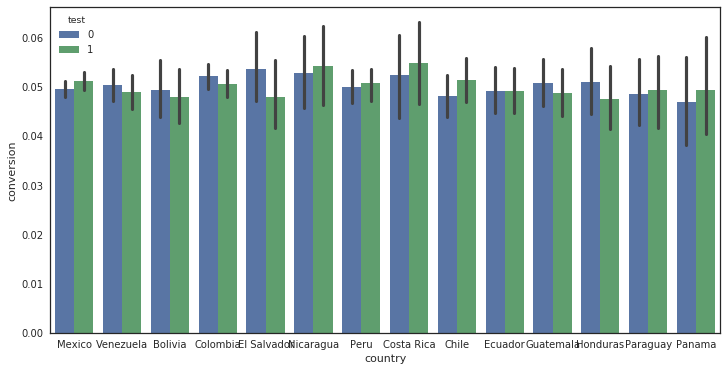

In [28]:
plt.figure(figsize=(12,6))
sns.set(style='white')
ax = sns.barplot(x='country', y='conversion',hue='test',data=data_ex,ci=95)